<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/naive-bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install sklearn pandas
!pip install prettytable
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=2bdb69c5395d1e54f22be95a588a84bb6049f33442dfca096a9c7f7398f96679
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
from google.colab import drive 
drive = drive.mount('/content/drive') 

Mounted at /content/drive


In [4]:
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import export_graphviz
from IPython import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv")

In [9]:
print('Naive bayes')
from sklearn.naive_bayes import GaussianNB

'''Create Naive bayes classifier'''
model1 = GaussianNB()
model2 = GaussianNB(var_smoothing = 1e-11)
model3 = GaussianNB(var_smoothing = 1e-09)
model4 = GaussianNB(var_smoothing = 1e-10)

'''Train and test'''
model1.fit(train_features, train_target)
model2.fit(train_features, train_target)
model3.fit(train_features, train_target)
model4.fit(train_features, train_target)

preds_test1 = model1.predict(test_features)
preds_test2 = model2.predict(test_features)
preds_test3 = model3.predict(test_features)
preds_test4 = model4.predict(test_features)

preds_train1 = model1.predict(train_features)
preds_train2 = model2.predict(train_features)
preds_train3 = model3.predict(train_features)
preds_train4 = model4.predict(train_features)

cr1 = confusion_matrix(test_target, preds_test1)
cr2 = confusion_matrix(test_target, preds_test2)
cr3 = confusion_matrix(test_target, preds_test3)
cr4 = confusion_matrix(test_target, preds_test4)

from sklearn.metrics import f1_score

f1_micro_test1 = f1_score(test_target, preds_test1, average = 'micro')
f1_micro_test2 = f1_score(test_target, preds_test2, average = 'micro')
f1_micro_test3 = f1_score(test_target, preds_test3, average = 'micro')
f1_micro_test4 = f1_score(test_target, preds_test4, average = 'micro')

f1_micro_train1 = f1_score(train_target, preds_train1, average = 'micro')
f1_micro_train2 = f1_score(train_target, preds_train2, average = 'micro')
f1_micro_train3 = f1_score(train_target, preds_train3, average = 'micro')
f1_micro_train4 = f1_score(train_target, preds_train4, average = 'micro')

f1_score_micro_test1 = "%.2f"%round(f1_micro_test1, 2)
f1_score_micro_test2 = "%.2f"%round(f1_micro_test2, 2)
f1_score_micro_test3 = "%.2f"%round(f1_micro_test3, 2)
f1_score_micro_test4 = "%.2f"%round(f1_micro_test4, 2)

f1_score_micro_train1 = "%.2f"%round(f1_micro_train1, 2)
f1_score_micro_train2 = "%.2f"%round(f1_micro_train2, 2)
f1_score_micro_train3 = "%.2f"%round(f1_micro_train3, 2)
f1_score_micro_train4 = "%.2f"%round(f1_micro_train4, 2)

head = PrettyTable(['var_smoothing', 'confusion_matrix', 'f1_score_micro_train', 'f1_score_micro_test']) 
head.add_row(['', cr1, f1_score_micro_train1, f1_score_micro_test1]) 
head.add_row(['1e-11', cr2, f1_score_micro_train2, f1_score_micro_test2]) 
head.add_row(['1e-9', cr3, f1_score_micro_train3, f1_score_micro_test3]) 
head.add_row(['1e-10', cr4, f1_score_micro_train4, f1_score_micro_test4]) 
print(head)

Naive bayes


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

+---------------+--------------------+----------------------+---------------------+
| var_smoothing |  confusion_matrix  | f1_score_micro_train | f1_score_micro_test |
+---------------+--------------------+----------------------+---------------------+
|               | [[2070   68  372]  |         0.48         |         0.49        |
|               |  [1137   49  334]  |                      |                     |
|               |  [ 630   17  322]] |                      |                     |
|     1e-11     | [[2070   68  372]  |         0.48         |         0.49        |
|               |  [1137   49  334]  |                      |                     |
|               |  [ 630   17  322]] |                      |                     |
|      1e-9     | [[2070   68  372]  |         0.48         |         0.49        |
|               |  [1137   49  334]  |                      |                     |
|               |  [ 630   17  322]] |                      |               

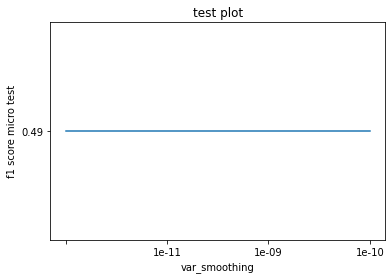

In [10]:
x = ['', '1e-11', '1e-09', '1e-10']
y = [f1_score_micro_test1, f1_score_micro_test2, f1_score_micro_test3, f1_score_micro_test4]
plt.plot(x, y) 
plt.xlabel('var_smoothing') 
plt.ylabel('f1 score micro test') 
plt.title('test plot') 
plt.show()

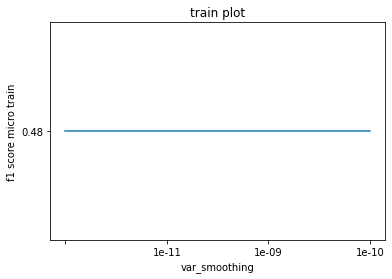

In [11]:
x = ['', '1e-11', '1e-09', '1e-10']
y = [f1_score_micro_train1, f1_score_micro_train2, f1_score_micro_train3, f1_score_micro_train4]
plt.plot(x, y) 
plt.xlabel('var_smoothing') 
plt.ylabel('f1 score micro train') 
plt.title('train plot') 
plt.show()